In [ ]:
%matplotlib inline

import seaborn as sns # Будем визулизировать данные этой библиотекой
import pandas as pd # Библиотека для работы с датафреймом
from tensorflow.keras import utils # Будем использовать эту библиотеку для
import numpy as np # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Будем визулизировать данные этой библиотекой

import re # Регулряные выражения для эффективной работы со строками

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# Загрузка файлов из облака
import gdown

In [ ]:
# data = pd.read_csv('отправка_комбинации поддержка после ПХТ 3 стадия.xlsx - отправка.csv')    # С помощью метода read_csv загружаем файл wine_base.csv и записываем данные в data

In [ ]:
# отсюда выгружаем файл
#data = pd.read_csv('/content/drive/My Drive/отправка_комбинации поддержка после ПХТ 3 стадия.xlsx - отправка.csv')

In [ ]:
# Загрузка файла датасета №1 НМИЦ профилактической медицины от 2023.09.06
url1 = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1Vcu3UZuw55Wtg2q_fFjf39YcoN-8Vz-Y'
# lung_cancer -> рак легких
url2 = '/content/lung_cancer_20230906.xlsx'
gdown.download(url1, url2, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1Vcu3UZuw55Wtg2q_fFjf39YcoN-8Vz-Y
To: /content/lung_cancer_20230906.xlsx
100%|██████████| 17.5M/17.5M [00:00<00:00, 33.3MB/s]


'/content/lung_cancer_20230906.xlsx'

In [ ]:
# Чтение данных из файла excel в pandas.DataFrame
data = pd.read_excel(url2)

In [ ]:
data.head() # С помощью метода head выводим первые 5 строк нашего ДатаФрейма

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
3,4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
4,5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...


In [ ]:
data.shape

(248832, 21)

In [ ]:
# Прверка балансировки
data_colnames = data.columns.tolist()
# print(f'названия колонок: {len(df1_colnames)}: {df1_colnames}')

lst_count = len(data_colnames)
for i in range(lst_count):
  i_elem = data_colnames[i]
  print(f"{i}->{lst_count}: '{i_elem}'")

0->21: 'id_ответа'
1->21: 'Раса'
2->21: 'Пол'
3->21: 'Возраст'
4->21: 'Статус курения'
5->21: 'ECOG'
6->21: 'Есть опухолевая нагрузка? (симптомная опухоль)'
7->21: 'Ко-мутации KRAS'
8->21: 'Ко-мутации p53.'
9->21: 'Ко-мутации STK11'
10->21: 'Ко-мутации KEAP1'
11->21: 'Срок от окончания ХЛТ'
12->21: 'Молекулярный статус (только для неплоскоклеточного рака)'
13->21: 'PD-L1 статус'
14->21: 'Предпочтение пациента по ответу на терапию'
15->21: 'Ответ эксперта (Лактионов)'
16->21: 'Поставьте галочку, если уверены на 100%'
17->21: 'Если 75%'
18->21: 'Если 50%'
19->21: 'Альтернатива, если 50% - обязательно'
20->21: 'Комментарий'


In [ ]:
# Перебираем все названия столбцов и для каждого выводим список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

id_ответа : [     1      2      3 ... 248830 248831 248832]
Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' 2]
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектиниб'

In [ ]:
# проверяем Пропущеные значения
missing_values = data.isnull().sum()
print(missing_values)

id_ответа                                                   0
Раса                                                        0
Пол                                                         0
Возраст                                                     0
Статус курения                                              0
ECOG                                                        0
Есть опухолевая нагрузка? (симптомная опухоль)              0
Ко-мутации KRAS                                             0
Ко-мутации p53.                                             0
Ко-мутации STK11                                            0
Ко-мутации KEAP1                                            0
Срок от окончания ХЛТ                                       0
Молекулярный статус (только для неплоскоклеточного рака)    0
PD-L1 статус                                                0
Предпочтение пациента по ответу на терапию                  0
Ответ эксперта (Лактионов)                                  0
Поставьт

In [ ]:
# Удаление ненужных столбцов
del data['id_ответа']
del data['Комментарий']
del data['Альтернатива, если 50% - обязательно']
del data['Если 50%']
del data['Если 75%']
del data['Поставьте галочку, если уверены на 100%']

In [ ]:
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб


# Кодирование данных

In [ ]:
df = data

In [ ]:
df['Раса'] = df['Раса'].replace({'Другая': 0, 'Азиатская': 1, 'Европейская': 2})
df['Пол'] = df['Пол'].replace({' Женский': 0, ' Мужской': 1})
df['Возраст'] = df['Возраст'].replace({' До 70': 0, ' >70': 1})
df['Статус курения'] = df['Статус курения'].replace({' В настоящее время': 0, ' Курение в прошлом (бросил более 1 года)': 1, ' Курение в прошлом (бросил более 1 месяца до 1 года)': 2})
df['ECOG'] = df['ECOG'].replace({' 0-1': 0, '2': 1})
df['Есть опухолевая нагрузка? (симптомная опухоль)'] = df['Есть опухолевая нагрузка? (симптомная опухоль)'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KRAS'] = df['Ко-мутации KRAS'].replace({' да': 0, ' нет': 1})
df['Ко-мутации p53.'] = df['Ко-мутации p53.'].replace({' да': 0, ' нет': 1})
df['Ко-мутации STK11'] = df['Ко-мутации STK11'].replace({' да': 0, ' нет': 1})
df['Ко-мутации KEAP1'] = df['Ко-мутации KEAP1'].replace({' да': 0, ' нет': 1})
df['Срок от окончания ХЛТ'] = df['Срок от окончания ХЛТ'].replace({'до 42 дней': 0, 'от 43 до 60 дней': 1, 'более 61 дня': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' ALK позитивный': 0, ' EGFR ex19': 1, ' EGFR ex21': 2})
df['Молекулярный статус (только для неплоскоклеточного рака)'] = df['Молекулярный статус (только для неплоскоклеточного рака)'].replace({' EGFR редкий вариант': 3, ' не исследовались': 4, ' нет мутаций': 5})
df['PD-L1 статус'] = df['PD-L1 статус'].replace({' Более 1%': 0, ' Менее 1%': 1, ' Не исследовался': 2})
df['Предпочтение пациента по ответу на терапию'] = df['Предпочтение пациента по ответу на терапию'].replace({' Результативность лечения': 0, ' сохранение качества жизни': 1})
df['Ответ эксперта (Лактионов)'] = df['Ответ эксперта (Лактионов)'].replace({'Алектиниб': 0, 'Дурвалумаб': 1, 'Осимертиниб': 2, 'Наблюдение': 3})

In [ ]:
df

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,1,1,0,0,0,0,0,0,0,0,0,5,2,0,1
1,1,1,0,0,0,0,0,0,0,0,1,5,2,0,1
2,1,1,0,0,0,0,0,0,0,0,2,5,2,0,2
3,1,1,0,0,0,0,0,0,0,0,0,4,2,0,1
4,1,1,0,0,0,0,0,0,0,0,1,4,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248827,0,0,1,1,2,1,1,1,1,1,1,2,0,1,2
248828,0,0,1,1,2,1,1,1,1,1,2,2,0,1,2
248829,0,0,1,1,2,1,1,1,1,1,0,0,0,1,0
248830,0,0,1,1,2,1,1,1,1,1,1,0,0,1,0


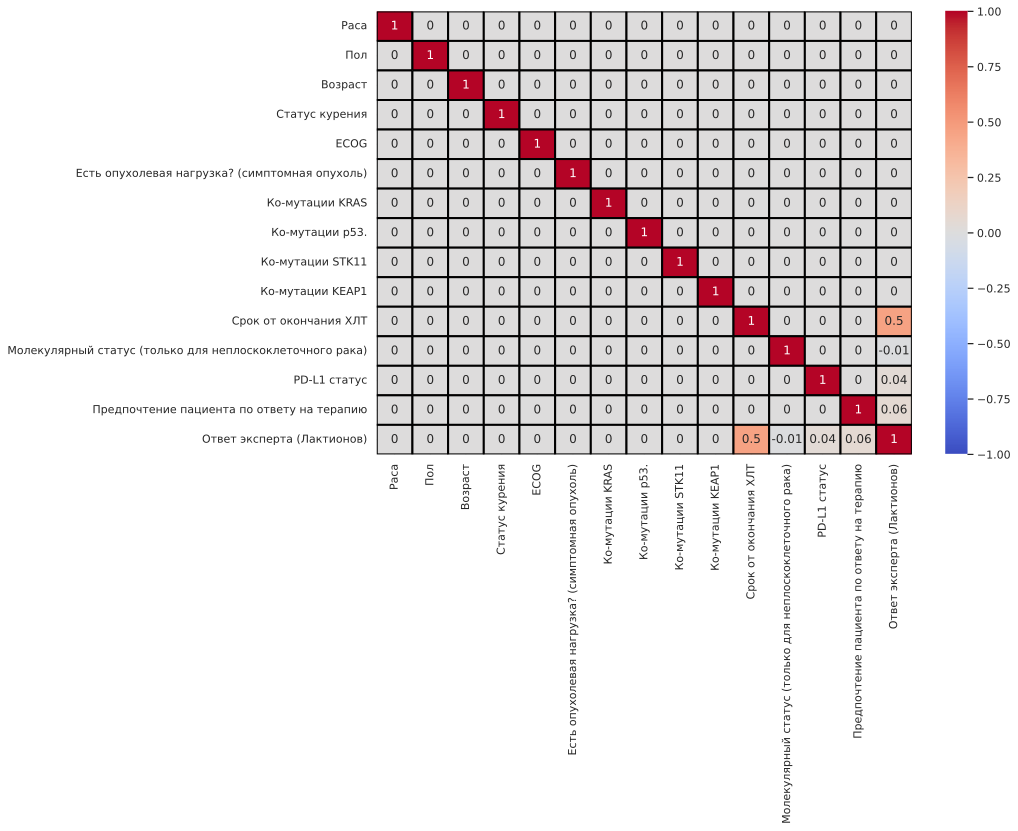

In [ ]:

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

sns.set(style='whitegrid', palette='muted')

corr_matrix = df.corr('spearman')

sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')
plt.show()

# Подготовка для обучения

In [ ]:
# Импортируем библиотеки
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, AdamW, Adadelta, Adagrad, Adamax, Adafactor, Nadam, Ftrl
from tensorflow.keras.layers import Activation
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import matplotlib.pyplot as plt
import gdown, os, random
import pandas as pd
import csv
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
encoded_df = pd.get_dummies(df)

encoded_df.columns

Index(['Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию',
       'Ответ эксперта (Лактионов)'],
      dtype='object')

In [ ]:
x_data = encoded_df[['Раса', 'Пол', 'Возраст', 'Статус курения', 'ECOG',
       'Есть опухолевая нагрузка? (симптомная опухоль)', 'Ко-мутации KRAS',
       'Ко-мутации p53.', 'Ко-мутации STK11', 'Ко-мутации KEAP1',
       'Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'PD-L1 статус', 'Предпочтение пациента по ответу на терапию']]
y_data = encoded_df[['Ответ эксперта (Лактионов)_0', 'Ответ эксперта (Лактионов)_1',
       'Ответ эксперта (Лактионов)_2',
       'Ответ эксперта (Лактионов)_3']]

In [ ]:
display(y_data)

In [ ]:
x = df[df.columns[0:14]]
y = df[df.columns[14]]

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(199065, 14)
(49767, 14)
(199065,)
(49767,)
